In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [2]:
def load_json(file_path):
    with open(file_path, 'r') as fp:
        data = json.load(fp)
    return data

In [3]:
latex = True
#plotting and colour set ups
if latex:
#     matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
#         'text.usetex': True,
        'pgf.rcfonts': False,
    })

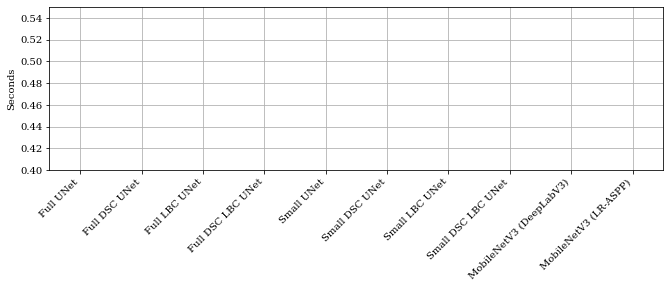

In [4]:
d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cuda_v{0}.json')
df = pd.DataFrame.from_dict(d, orient='index')
for i in range(1, 10):
    d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cuda_v{i}.json')
    df_tmp = pd.DataFrame.from_dict(d, orient='index')
    df[i] = df_tmp


naming_dict = {'unet': 'Full UNet', 'lbc_unet': 'Full LBC UNet', 'deeplab_mobile_net': 'MobileNetV3 (DeepLabV3)', 'lraspp_mobile_net': 'MobileNetV3 (LR-ASPP)',
       'dsc_unet': 'Full DSC UNet', 'skinny_small_dsc_unet': 'Small DSC UNet', 'dsc_lbc_unet': 'Full DSC LBC UNet', 'skinny_small_dsc_lbc_unet': 'Small DSC LBC UNet',
       'skinny_small_unet': 'Small UNet', 'skinny_small_lbc_unet': 'Small LBC UNet'}

df_small = df.T[['skinny_small_unet', 'skinny_small_dsc_unet', 'skinny_small_lbc_unet', 'skinny_small_dsc_lbc_unet']].rename(columns=naming_dict)
df_full = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet']].rename(columns=naming_dict)
df_mobile = df.T[['deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)

df_all = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet', 'skinny_small_unet', 'skinny_small_dsc_unet', 'skinny_small_lbc_unet', 'skinny_small_dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)


ticks = [x for x in df_small.columns]
# ticks[3] = r'$\bf{Small DSC LBC UNet}$'

fig, ax = plt.subplots(figsize=(11,3))
df_all.boxplot(column=[x for x in df_all.columns], rot=45, ax=ax)
ax.set_ylim(0.4,0.55)
# ax.set_title('(a) Full UNets')
ax.set_ylabel('Seconds')
plt.setp(ax.get_xticklabels(), horizontalalignment='right');
# plt.vlines(4.5, 5, 9.5, colors='k', linewidth=0.7)
# plt.vlines(8.5, 5, 9.5, colors='k', linewidth=0.7)
# plt.text(1.8, 9.65, '(a) Full UNets', fontsize=11);
# plt.text(5.71, 9.65, '(b) Small UNets', fontsize=11);
# plt.text(8.8, 9.65, '(c) MobileNets', fontsize=11);

In [5]:
df_all.median().round(2)

Full UNet                  8.50
Full DSC UNet              8.78
Full LBC UNet              8.06
Full DSC LBC UNet          5.60
Small UNet                 4.37
Small DSC UNet             4.48
Small LBC UNet             4.65
Small DSC LBC UNet         4.60
MobileNetV3 (DeepLabV3)    6.78
MobileNetV3 (LR-ASPP)      5.79
dtype: float64

In [6]:
#fig.savefig("../images/times_cuda_v2.svg", format='svg', dpi=1200)

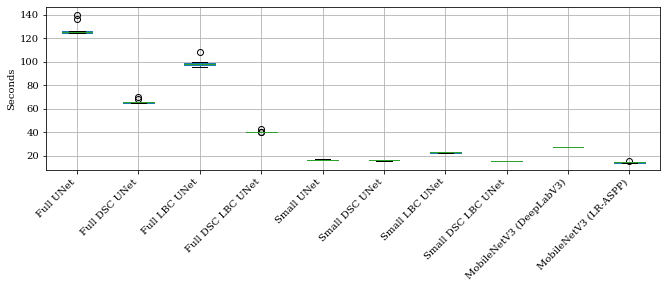

In [7]:
d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cpu_v{0}.json')
df = pd.DataFrame.from_dict(d, orient='index')
for i in range(1, 10):
    d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cpu_v{i}.json')
    df_tmp = pd.DataFrame.from_dict(d, orient='index')
    df[i] = df_tmp

naming_dict = {'unet': 'Full UNet', 'lbc_unet': 'Full LBC UNet', 'deeplab_mobile_net': 'MobileNetV3 (DeepLabV3)', 'lraspp_mobile_net': 'MobileNetV3 (LR-ASPP)',
       'dsc_unet': 'Full DSC UNet', 'skinny_small_dsc_unet': 'Small DSC UNet', 'dsc_lbc_unet': 'Full DSC LBC UNet', 'skinny_small_dsc_lbc_unet': 'Small DSC LBC UNet',
       'skinny_small_unet': 'Small UNet', 'skinny_small_lbc_unet': 'Small LBC UNet'}

df_small = df.T[['skinny_small_unet', 'skinny_small_dsc_unet', 'skinny_small_lbc_unet', 'skinny_small_dsc_lbc_unet']].rename(columns=naming_dict)
df_full = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet']].rename(columns=naming_dict)
df_mobile = df.T[['deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)

df_all = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet', 'skinny_small_unet', 'skinny_small_dsc_unet', 'skinny_small_lbc_unet', 'skinny_small_dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)


ticks = [x for x in df_small.columns]
# ticks[3] = r'$\bf{Small DSC LBC UNet}$'

fig, ax = plt.subplots(figsize=(11,3))
df_all.boxplot(column=[x for x in df_all.columns], rot=45, ax=ax)
# ax.set_ylim(10,160)
# ax.set_title('(a) Full UNets')
ax.set_ylabel('Seconds')
plt.setp(ax.get_xticklabels(), horizontalalignment='right');
# plt.vlines(4.5, 10, 160, colors='k', linewidth=0.7)
# plt.vlines(8.5, 10, 160, colors='k', linewidth=0.7)
# plt.text(1.8, 165, '(a) Full UNets', fontsize=11);
# plt.text(5.71, 165, '(b) Small UNets', fontsize=11);
# plt.text(8.8, 165, '(c) MobileNets', fontsize=11);

In [8]:
df_all.median().round(2)

Full UNet                  125.37
Full DSC UNet               65.96
Full LBC UNet               97.84
Full DSC LBC UNet           40.41
Small UNet                  16.63
Small DSC UNet              16.33
Small LBC UNet              22.86
Small DSC LBC UNet          15.58
MobileNetV3 (DeepLabV3)     27.51
MobileNetV3 (LR-ASPP)       14.25
dtype: float64

In [10]:
df_small['Small DSC LBC UNet'].mean()

32.4267138004303

In [11]:
df_mobile['MobileNetV3 (LR-ASPP)'].mean()

14.40540189743042

In [14]:
#fig.savefig("../images/times_cpu_v2.svg", format='svg', dpi=1200)

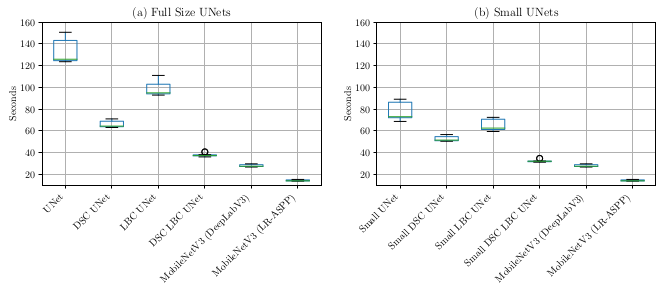

In [7]:
d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cpu_v{0}.json')
df = pd.DataFrame.from_dict(d, orient='index')
for i in range(1, 10):
    d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cpu_v{i}.json')
    df_tmp = pd.DataFrame.from_dict(d, orient='index')
    df[i] = df_tmp

df = df.drop('small_axial_lbc_unet')

naming_dict = {'unet': 'UNet', 'lbc_unet': 'LBC UNet', 'deeplab_mobile_net': 'MobileNetV3 (DeepLabV3)', 'lraspp_mobile_net': 'MobileNetV3 (LR-ASPP)',
       'dsc_unet': 'DSC UNet', 'small_dsc_unet': 'Small DSC UNet', 'dsc_lbc_unet': 'DSC LBC UNet', 'small_dsc_lbc_unet': 'Small DSC LBC UNet',
       'small_unet': 'Small UNet', 'small_lbc_unet': 'Small LBC UNet'}

df_small = df.T[['small_unet', 'small_dsc_unet', 'small_lbc_unet', 'small_dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)
df_full = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)

ticks = [x for x in df_small.columns]
# ticks[3] = "$\\bf{Small DSC LBC UNet}$"

fig, axs = plt.subplots(1,2, figsize=(11,3))
df_full.boxplot(column=[x for x in df_full.columns], rot=45, ax=axs[0])
axs[0].set_ylim(10,160)
axs[0].set_title('(a) Full Size UNets')
axs[0].set_ylabel('Seconds')
plt.setp(axs[0].get_xticklabels(), horizontalalignment='right')
df_small.boxplot(column=[x for x in df_small.columns], rot=45, ax=axs[1])
axs[1].set_ylim(10,160)
axs[1].set_ylabel('Seconds')
axs[1].set_title('(b) Small UNets');
axs[1].set_xticklabels(ticks)
plt.setp(axs[1].get_xticklabels(), horizontalalignment='right');
# fig.suptitle('CPU Runtime for 3 Epochs');

In [8]:
# fig.savefig("../images/times_cpu.svg", format='svg', dpi=1200)